## **1. Set Up**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
train_df =  pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## **2. Explore Dataset**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


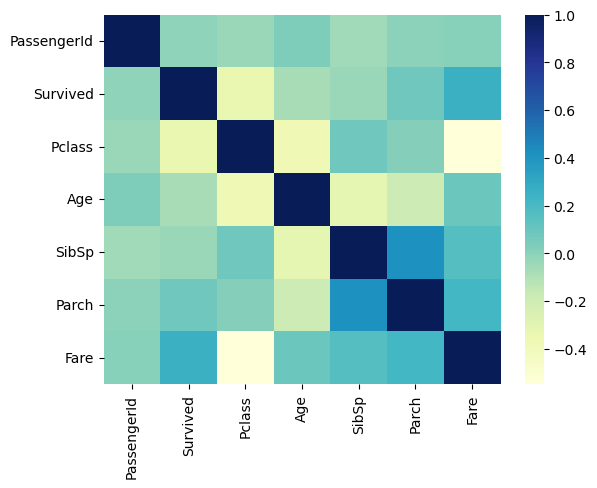

In [6]:
import seaborn as sns
sns.heatmap(train_df.corr(numeric_only=True), cmap='YlGnBu')
plt.show()

In [7]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

In [ ]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

In [ ]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

In [ ]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

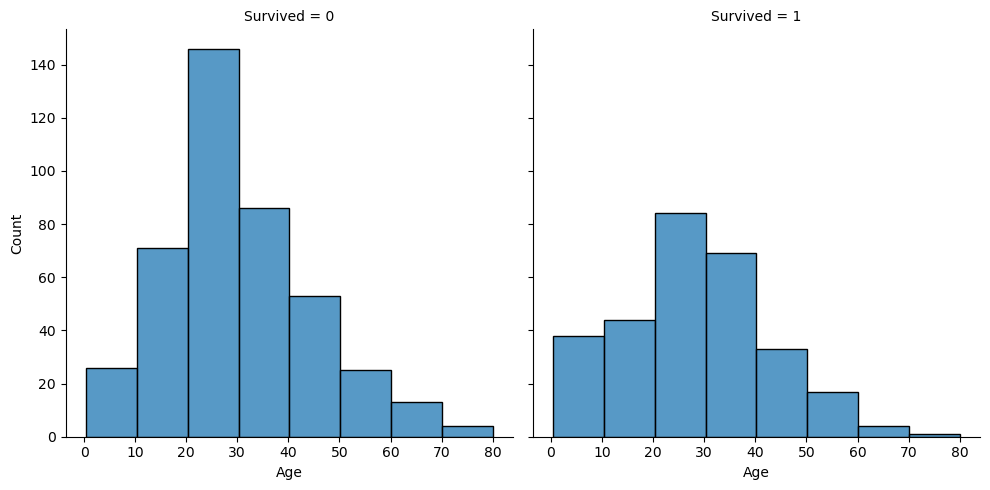

In [8]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

## **3. Data Preprocessing**

### 3.1. Integrate two columns: (SibSp, Parch -> Family_Size)

In [9]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [10]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [11]:
family_map = {1:'Alone', 2:'Small', 3:'Small',4:'Small',
              5:'Medium', 6:'Medium',
              7:'Large', 8:'Large', 11:'Large'}
train_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Group'] = test_df['Family_Size'].map(family_map)

### 3.2. Binning "Age" Column

**`pd.qcut(x,q)`** <br>
Discretize variable into equal-sized buckets based on quantiles.
 - `x` data(column)
 - `q` number of quantiles

In [12]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'],8) 
test_df['Age_Cut'] = pd.qcut(train_df['Age'],8) 

In [13]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_49178/1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [14]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1 
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24.0), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24.0) & (train_df['Age'] <= 28.0), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28.0) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38.0), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38.0) & (train_df['Age'] <= 47.0), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47.0) & (train_df['Age'] <= 80.0), 'Age'] = 7

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1 
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24.0), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24.0) & (test_df['Age'] <= 28.0), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28.0) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38.0), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38.0) & (test_df['Age'] <= 47.0), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47.0) & (test_df['Age'] <= 80.0), 'Age'] = 7

### 3.3. Binning "Fare" Column

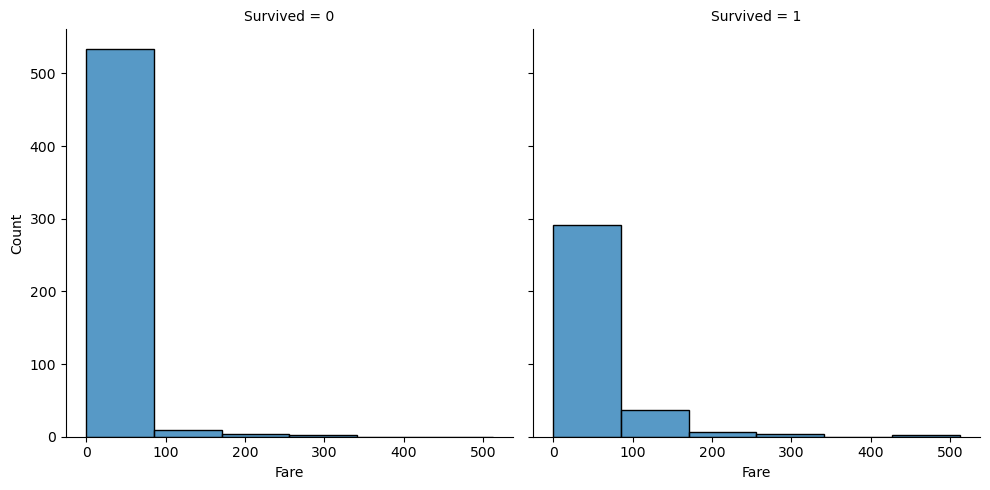

In [15]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [16]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'],6) 
test_df['Fare_Cut'] = pd.qcut(train_df['Fare'],6) 

In [17]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_49178/1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [18]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1 
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1 
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


### 3.4. Create a new column "Title" (derived from "Name")

**`.str.split(pat, expand)`** <br>
- `pat`: separator
- `expand`: True returns dataframe

In [19]:
train_df['Name'].str.split(pat=",", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [20]:
train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat='.', expand=True)

,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
886,Rev,Juozas,None
887,Miss,Margaret Edith,None
888,Miss,"Catherine Helen ""Carrie""",None
889,Mr,Karl Howell,None


In [21]:
train_df['Title'] = train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())

In [22]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


**`.replace(to_replace, value)`** <br>
- `to_replace` turn into `value`
- if `to_replace` is dictionary, `value` is ignored

In [23]:
train_df['Title'] = train_df['Title'].replace({
    'Capt':'Military',
    'Col' :'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Military',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mile' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

test_df['Title'] = test_df['Title'].replace({
    'Capt':'Military',
    'Col' :'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Military',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mile' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble',
})

In [24]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Military,0.333333
3,Miss,0.697802
4,Mlle,1.000000
5,Mr,0.156673
6,Mrs,0.792000
7,Noble,0.833333
8,Rev,0.000000


### 3.5. Binning "Name" Column (by length)

In [25]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x)) 
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x)) 

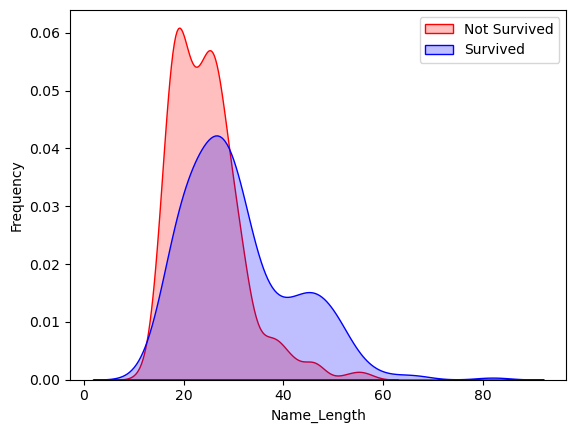

In [26]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())],color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())],color='Blue', fill=True) 
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g=g.legend(['Not Survived', 'Survived'])

In [27]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8) 
test_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8) 

In [28]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_49178/554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [29]:
train_df.loc[train_df['Name_Length'] <= 18.0, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18.0) & (train_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20.0) & (train_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23.0) & (train_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25.0) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30.0) & (train_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38.0) & (train_df['Name_Length'] <= 82.0), 'Name_Size'] = 7

test_df.loc[test_df['Name_Length'] <= 18.0, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18.0) & (test_df['Name_Length'] <= 20.0), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20.0) & (test_df['Name_Length'] <= 23.0), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23.0) & (test_df['Name_Length'] <= 25.0), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25.0) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30.0), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30.0) & (test_df['Name_Length'] <= 38.0), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38.0) & (test_df['Name_Length'] <= 82.0), 'Name_Size'] = 7


train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


### 3.6 Create a new column "TicketNumberCount"
**"TicketNumberCount"** shows the number of people who has the same ticket number

In [30]:
# Extract only numeric value from "Ticket" -> "TicketNumber"

train_df['TicketNumber'] =  train_df['Ticket'].apply(lambda x: x.split()[-1])
test_df['TicketNumber'] =  test_df['Ticket'].apply(lambda x: x.split()[-1])

In [31]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False) 

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [32]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [33]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')


In [34]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)  

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


### 3.7. Create a new column "Cabin_Assigned"

In [35]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0])

In [36]:
test_df['Cabin'] = train_df['Cabin'].fillna('U')
test_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0])

In [37]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [38]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [39]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


### 3.8. Fill in missing values

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_Size         891 non-null    int64   
 13  Family_Size_Group   891 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Family_Size         418 non-null    int64   
 12  Family_Size_Group   418 non-null    object  
 13  Age_Cut             335 non-null    category
 14  Fare_Cut            418 non-null    category
 15  Title               418 non-null    obje

In [42]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_49178/623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/var/folders/82/038lb7sx7w981ctcvb0s2px00000gn/T/ipykernel_49178/623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

## **4. PipeLine**

In [43]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_Size         891 non-null    int64   
 13  Family_Size_Group   891 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

### 4.1. Data Split

In [44]:
# X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
# X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=21)

In [46]:
#ohe = OneHotEncoder(sparse_output=False)
#ode = OrdinalEncoder 
si = SimpleImputer(strategy='most_frequent')

### 4.2. Create Columntransformer

**Create two pipeline**
 - "ordinal_pipeline" for columns need ordinal encoding
 - "ohe_pipeline" for columns need OneHotEncoding

In [81]:
#ode_cols = ['Family_Size_Group']
ohe_cols = ['Sex', 'Embarked']

In [82]:
#ordinal_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
#                                   ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
#                                  ])

ohe_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                               ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
                              ])



In [83]:
col_trans = ColumnTransformer(transformers=[('impute', si, ['Age']),
                                            #('ord_pipeline', ordinal_pipeline, ode_cols),
                                            ('ohe_pipeline', ohe_pipeline, ohe_cols),
                                            ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])],
                              remainder='drop',
                              n_jobs=-1)

### 4.3. Create Model

#### 4.3.A. RandomForestClassifer

In [84]:
rfc = RandomForestClassifier()

In [85]:
param_grid = {'n_estimators': [150, 200, 300, 500],
              'max_depth': [10, 13, 15, 17, 20],
              'min_samples_leaf': [2, 4, 5, 6],
              'criterion': ['gini', 'entropy']}

In [86]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [87]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipefinalrfc.predict(X_valid)

print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))

0.7877094972067039
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179

[[94 11]
 [27 47]]


In [114]:
pipefinalrfc.score(X_train, y_train)

0.8609550561797753

#### 4.3.B. Decision Tree

In [90]:
dtc = DecisionTreeClassifier()

In [91]:
param_grid = {'min_samples_split': [5, 10, 15],
              'max_depth': [10, 20, 30],
              'min_samples_leaf': [1, 2, 4,],
              'criterion': ['gini', 'entropy']}

In [92]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [93]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipefinaldtc.predict(X_valid)

print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))

0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 13]
 [22 52]]


In [115]:
pipefinaldtc.score(X_train, y_train)

0.8567415730337079

#### 4.3.C. Logisitic Regression

In [97]:
lr = LogisticRegression()

In [98]:
param_grid = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

In [99]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [100]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1, 0.1, 0.01,
                                                0.001]}))])

In [116]:
pipefinallr.score(X_train, y_train)

0.8075842696629213

## **5. Submission**

In [110]:
y_pred_rfc = pipefinalrfc.predict(test_df)
y_pred_dtc = pipefinaldtc.predict(test_df)
y_pred_lr = pipefinallr.predict(test_df)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_Size_Group,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,Cabin_Assigned
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,1.0,U,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,16,"(20.0, 23.0]",0.0,330911,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,0.0,C,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,32,"(38.0, 82.0]",6.0,363272,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,2.0,U,...,Alone,"(24.0, 28.0]","(7.775, 8.662]",Mr,25,"(20.0, 23.0]",3.0,240276,1,0
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,2.0,C,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mr,16,"(38.0, 82.0]",0.0,315154,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,2.0,U,...,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mrs,44,"(23.0, 25.0]",7.0,3101298,1,0


In [112]:
submission_rfc = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':y_pred_rfc}) 
submission_dtc = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':y_pred_dtc})
submission_lr = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':y_pred_lr})

In [113]:
submission_rfc.to_csv('submission_rfc.csv', index=False)
submission_dtc.to_csv('submission_dtc.csv', index=False)
submission_lr.to_csv('submission_lr.csv', index=False)